<a href="https://colab.research.google.com/github/clarissa-souza/Sistema-Fuzzy/blob/main/Sistema_de_Controle_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 4.0MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894088 sha256=139eb2016ab156630bf6d3ed81f5d1a81c5dd1e86e06416c2b1edce6e45359fb
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


A determinação da pressão interna dentro de uma caldeira pode ser estimada em função de sua temperatura interna e do volume de água em seu interior. O especialista envolvido com o processo forneceu alguns dados que foram utilizados para o projeto de um sistema fuzzy para mapear o comportamento existente entre as entradas e saída deste processo. Essas informações são 
as seguintes:

Variáveis de Entrada:
• Temperatura: varia de 800oC a 1200oC.
• Volume: varia de 2m3 a 12m3 de água. 

Variável de Saída:
• Pressão: varia de 4 atm a 12 atm.

Após a análise preliminar do problema, o projetista propôs um sistema fuzzy para estimar a saída (pressão), a partir das entradas (temperatura e volume), tendo como formato para as funções de pertinência os seguintes padrões geométricos:
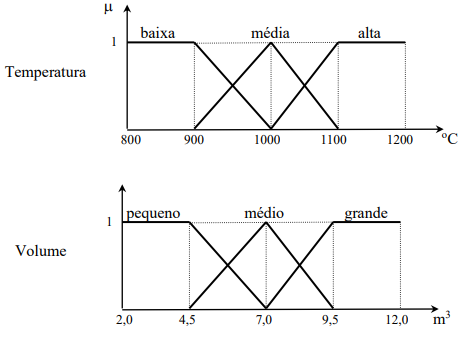
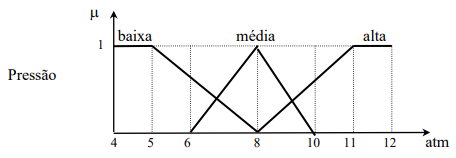

Importante as bibliotecas utilizadas:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

Variáveis de entrada e saída

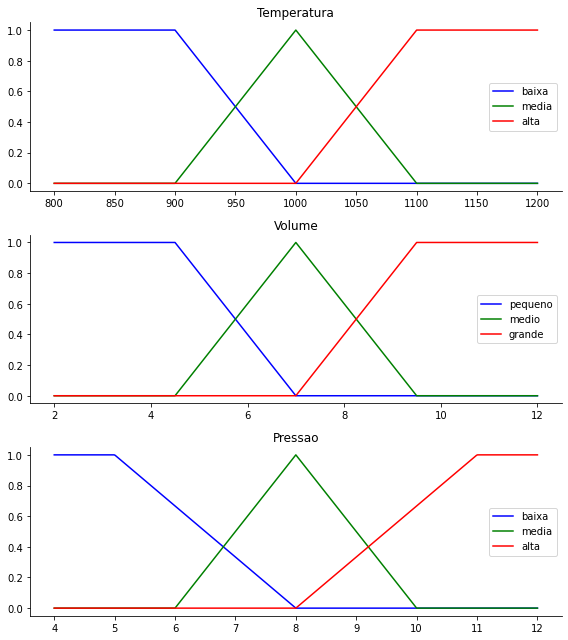

In [3]:
temperatura = np.arange(800.0, 1200.01, 0.8) 
volume = np.arange(2,12.01,0.02)
pressao = np.arange(4,12.01,0.016)

#verificando o array gerado
#temperatura
#volume
#pressao

temperatura_baixa = fuzz.trapmf(temperatura, [799, 800, 900, 1000])
temperatura_media = fuzz.trimf (temperatura, [900, 1000, 1100])
temperatura_alta = fuzz.trapmf(temperatura, [1000, 1100,1200, 1200.01])

volume_pequeno = fuzz.trapmf(volume, [1.9, 2, 4.5, 7])
volume_medio = fuzz.trimf (volume, [4.5, 7, 9.5])
volume_grande = fuzz.trapmf(volume, [7, 9.5,12, 12.02])

pressao_baixa = fuzz.trapmf(pressao, [3.9, 4, 5, 8])
pressao_media = fuzz.trimf(pressao, [6,8,10])
pressao_alta = fuzz.trapmf(pressao, [8, 11, 12, 12.02])

#visualizando o grafico Temperatura
fig,(ax0,ax1,ax2)=plt.subplots(nrows=3,figsize=(8,9))
ax0.plot(temperatura,temperatura_baixa,'b',linewidth=1.5,label='baixa')
ax0.plot(temperatura,temperatura_media,'g',linewidth=1.5,label='media')
ax0.plot(temperatura,temperatura_alta,'r',linewidth=1.5,label='alta')
ax0.set_title('Temperatura')
ax0.legend()

#visualizando o grafico Volume
ax1.plot(volume,volume_pequeno,'b',linewidth=1.5,label='pequeno')
ax1.plot(volume,volume_medio,'g',linewidth=1.5,label='medio')
ax1.plot(volume,volume_grande,'r',linewidth=1.5,label='grande')
ax1.set_title('Volume')
ax1.legend()

#visualizando o grafico Pressao
ax2.plot(pressao,pressao_baixa,'b',linewidth=1.5,label='baixa')
ax2.plot(pressao,pressao_media,'g',linewidth=1.5,label='media')
ax2.plot(pressao,pressao_alta,'r',linewidth=1.5,label='alta')
ax2.set_title('Pressao')
ax2.legend()

for ax in (ax0,ax1,ax2):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
plt.tight_layout()


O conjunto de regras fuzzy é dado pelas seguintes sentenças:

Regra 1: Se (Temperatura é Baixa) e (Volume é Pequeno) Então (Pressão é Baixa)

Regra 2: Se (Temperatura é Média) e (Volume é Pequeno) Então (Pressão é Baixa)

Regra 3: Se (Temperatura é Alta) e (Volume é Pequeno) Então (Pressão é Média)

Regra 4: Se (Temperatura é Baixa) e (Volume é Médio) Então (Pressão é Baixa)

Regra 5: Se (Temperatura é Média) e (Volume é Médio) Então (Pressão é Média)

Regra 6: Se (Temperatura é Alta) e (Volume é Médio) Então (Pressão é Alta)

Regra 7: Se (Temperatura é Baixa) e (Volume é Grande) Então (Pressão é Média)

Regra 8: Se (Temperatura é Média) e (Volume é Grande) Então (Pressão é Alta)

Regra 9: Se (Temperatura é Alta) e (Volume é Grande) Então (Pressão é Alta)

Simule o seguinte caso no sistema implementado:

Temperatura x = 965C e Volume = 11m3

Grau de pertinencia de 965 em temperatura baixa: 0.35
Grau de pertinencia de 965 em temperatura baixa: 0.65
Grau de pertinencia de 965 em temperatura baixa: 0.0
Grau de pertinencia de 11 em volume pequeno: 0.0
Grau de pertinencia de 11 em volume medio: 0.0
Grau de pertinencia de 11 em volume grande: 1.0
Pressão= 9.601766959650334


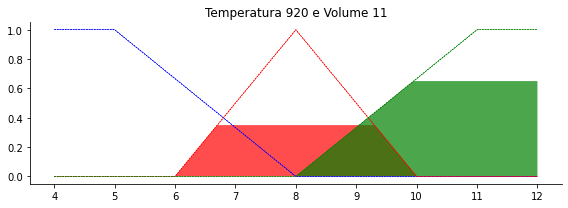

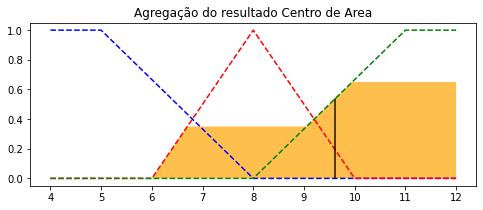

In [4]:
#########################################################################
##################### Temperatura 965 e Volume 11 #######################


#grau de pertinencia da Temepratura 965
temperatua_nivel_baixa=fuzz.interp_membership(temperatura,temperatura_baixa,965)
temperatua_nivel_media=fuzz.interp_membership(temperatura,temperatura_media,965)
temperatua_nivel_alta=fuzz.interp_membership(temperatura,temperatura_alta,965)
print('Grau de pertinencia de 965 em temperatura baixa:',temperatua_nivel_baixa)
print('Grau de pertinencia de 965 em temperatura baixa:',temperatua_nivel_media)
print('Grau de pertinencia de 965 em temperatura baixa:',temperatua_nivel_alta)

#grau de pertinencia de Volume 11
volume_nivel_pequeno=fuzz.interp_membership(volume,volume_pequeno,11)
volume_nivel_medio=fuzz.interp_membership(volume,volume_medio,11)
volume_nivel_grande=fuzz.interp_membership(volume,volume_grande,11)
print('Grau de pertinencia de 11 em volume pequeno:',volume_nivel_pequeno)
print('Grau de pertinencia de 11 em volume medio:',volume_nivel_medio)
print('Grau de pertinencia de 11 em volume grande:',volume_nivel_grande)

#ativacao das regras Mamdani
active_rule1=np.fmin(temperatua_nivel_baixa,volume_nivel_pequeno)
active_rule2=np.fmin(temperatua_nivel_baixa,volume_nivel_medio)
active_rule3=np.fmin(temperatua_nivel_baixa,volume_nivel_grande)
active_rule4=np.fmin(temperatua_nivel_media,volume_nivel_pequeno)
active_rule5=np.fmin(temperatua_nivel_media,volume_nivel_medio)
active_rule6=np.fmin(temperatua_nivel_media,volume_nivel_grande)
active_rule7=np.fmin(temperatua_nivel_alta,volume_nivel_pequeno)
active_rule8=np.fmin(temperatua_nivel_alta,volume_nivel_medio)
active_rule9=np.fmin(temperatua_nivel_alta,volume_nivel_grande)

#regras
#print(active_rule1)
#print(active_rule2)
#print(active_rule3)
#print(active_rule4)
#print(active_rule5)
#print(active_rule6)
#print(active_rule7)
#print(active_rule8)
#print(active_rule9)

#definicao das regras 
pressao_activation1=np.fmin(active_rule1,pressao_baixa)
pressao_activation2=np.fmin(active_rule4,pressao_baixa)
pressao_activation3=np.fmin(active_rule7,pressao_media)
pressao_activation4=np.fmin(active_rule2,pressao_baixa)
pressao_activation5=np.fmin(active_rule5,pressao_media)
pressao_activation6=np.fmin(active_rule8,pressao_alta)
pressao_activation7=np.fmin(active_rule3,pressao_media)
pressao_activation8=np.fmin(active_rule6,pressao_alta)
pressao_activation9=np.fmin(active_rule9,pressao_alta)
pressao0=np.zeros_like(pressao)

#grafico da pressao
fig,ax0=plt.subplots(figsize=(8,3))
ax0.fill_between(pressao,pressao0,pressao_activation1,facecolor='b',alpha=0.7)
ax0.plot(pressao,pressao_baixa,'b',linewidth=0.5,linestyle='--')
ax0.fill_between(pressao,pressao0,pressao_activation2,facecolor='b',alpha=0.7)
ax0.plot(pressao,pressao_baixa,'b',linewidth=0.5,linestyle='--')
ax0.fill_between(pressao,pressao0,pressao_activation3,facecolor='r',alpha=0.7)
ax0.plot(pressao,pressao_media,'r',linewidth=0.5,linestyle='--')
ax0.fill_between(pressao,pressao0,pressao_activation4,facecolor='b',alpha=0.7)
ax0.plot(pressao,pressao_baixa,'b',linewidth=0.5,linestyle='--')
ax0.fill_between(pressao,pressao0,pressao_activation5,facecolor='r',alpha=0.7)
ax0.plot(pressao,pressao_media,'r',linewidth=0.5,linestyle='--')
ax0.fill_between(pressao,pressao0,pressao_activation6,facecolor='g',alpha=0.7)
ax0.plot(pressao,pressao_alta,'g',linewidth=0.5,linestyle='--')
ax0.fill_between(pressao,pressao0,pressao_activation7,facecolor='r',alpha=0.7)
ax0.plot(pressao,pressao_media,'r',linewidth=0.5,linestyle='--')
ax0.fill_between(pressao,pressao0,pressao_activation8,facecolor='g',alpha=0.7)
ax0.plot(pressao,pressao_alta,'g',linewidth=0.5,linestyle='--')
ax0.fill_between(pressao,pressao0,pressao_activation9,facecolor='g',alpha=0.7)
ax0.plot(pressao,pressao_alta,'g',linewidth=0.5,linestyle='--')
ax0.set_title('Temperatura 920 e Volume 11')

for ax in (ax0,):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
plt.tight_layout()

#agregando a ativacao
aggregated=np.fmax(pressao_activation1,
                   np.fmax(pressao_activation2,
                           np.fmax(pressao_activation3,
                                   np.fmax(pressao_activation4,
                                           np.fmax(pressao_activation5,
                                                  np.fmax(pressao_activation6,
                                                          np.fmax(pressao_activation7,
                                                                   np.fmax(pressao_activation8,pressao_activation9))))))))

#defuzz com centroide
pressao_defuz=fuzz.defuzz(pressao,aggregated,'centroid')
pressao_activation=fuzz.interp_membership(pressao,aggregated,pressao_defuz)


#grafico defuzz
fig,ax0=plt.subplots(figsize=(8,3))
ax0.plot(pressao, pressao_baixa, 'b', linewidth=1.5,linestyle='--')
ax0.plot(pressao, pressao_media, 'r', linewidth=1.5,linestyle='--')
ax0.plot(pressao, pressao_alta, 'g', linewidth=1.5,linestyle='--')
ax0.fill_between(pressao,pressao0,aggregated,facecolor='Orange',alpha=0.7)
ax0.plot([pressao_defuz,pressao_defuz],[0,pressao_activation],'k',linewidth=1.5,alpha=0.9)
ax0.set_title('Agregação do resultado Centro de Area')
print('Pressão=',pressao_defuz)